# Outliers in EDA

## Imports


In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [25]:
# reading the csv
df = pd.read_csv(r"C:\Users\Lahari Reddy\Desktop\GoogleDA\Exploratory_Data_Analysis\eda_outliers_dataset1.csv")

In [26]:
#printing first 10 rows
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [27]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)

In [28]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [29]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


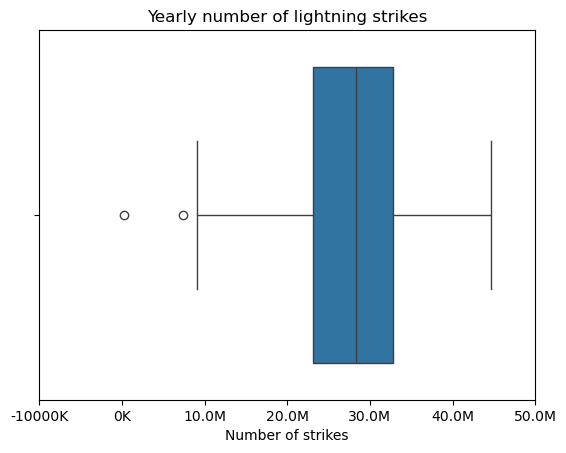

In [30]:
# Create boxplot
box = sns.boxplot(x=df['number_of_strikes'])
ticks = g.get_xticks()
box.set_xticks(ticks) 
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

In [31]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


In [32]:
# Isolate outliers on low end
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


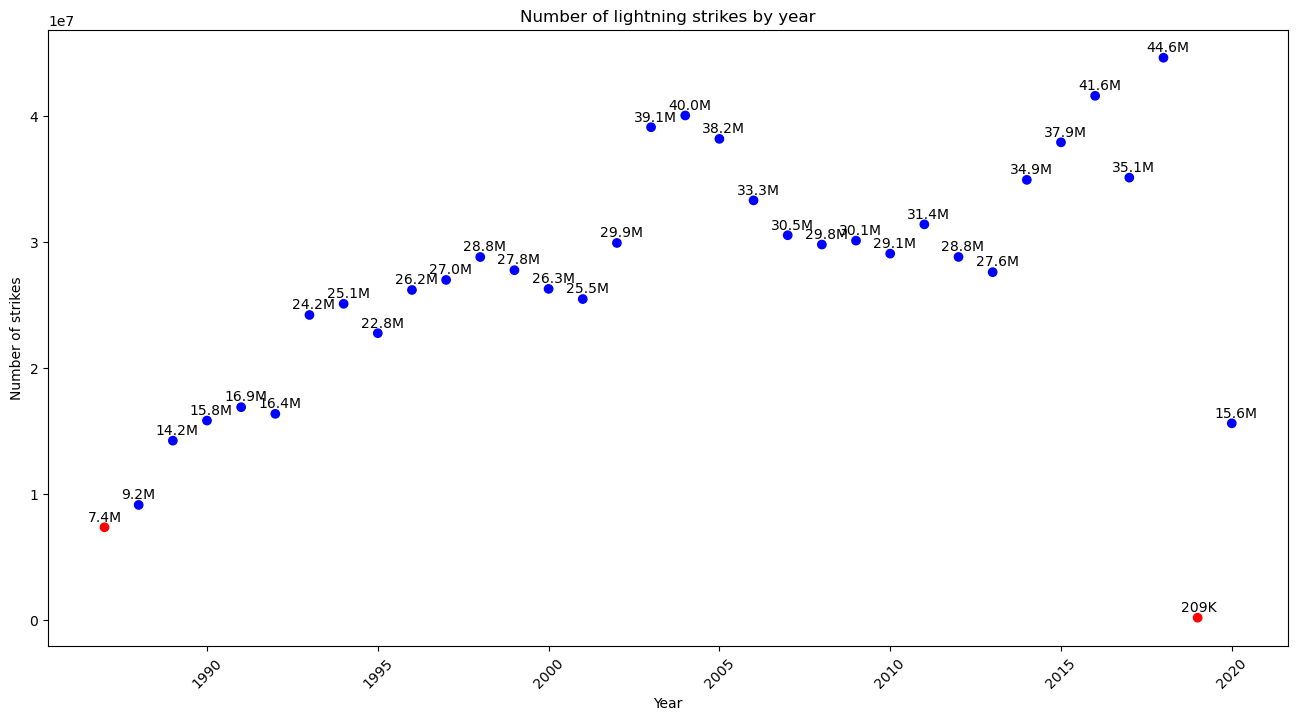

In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

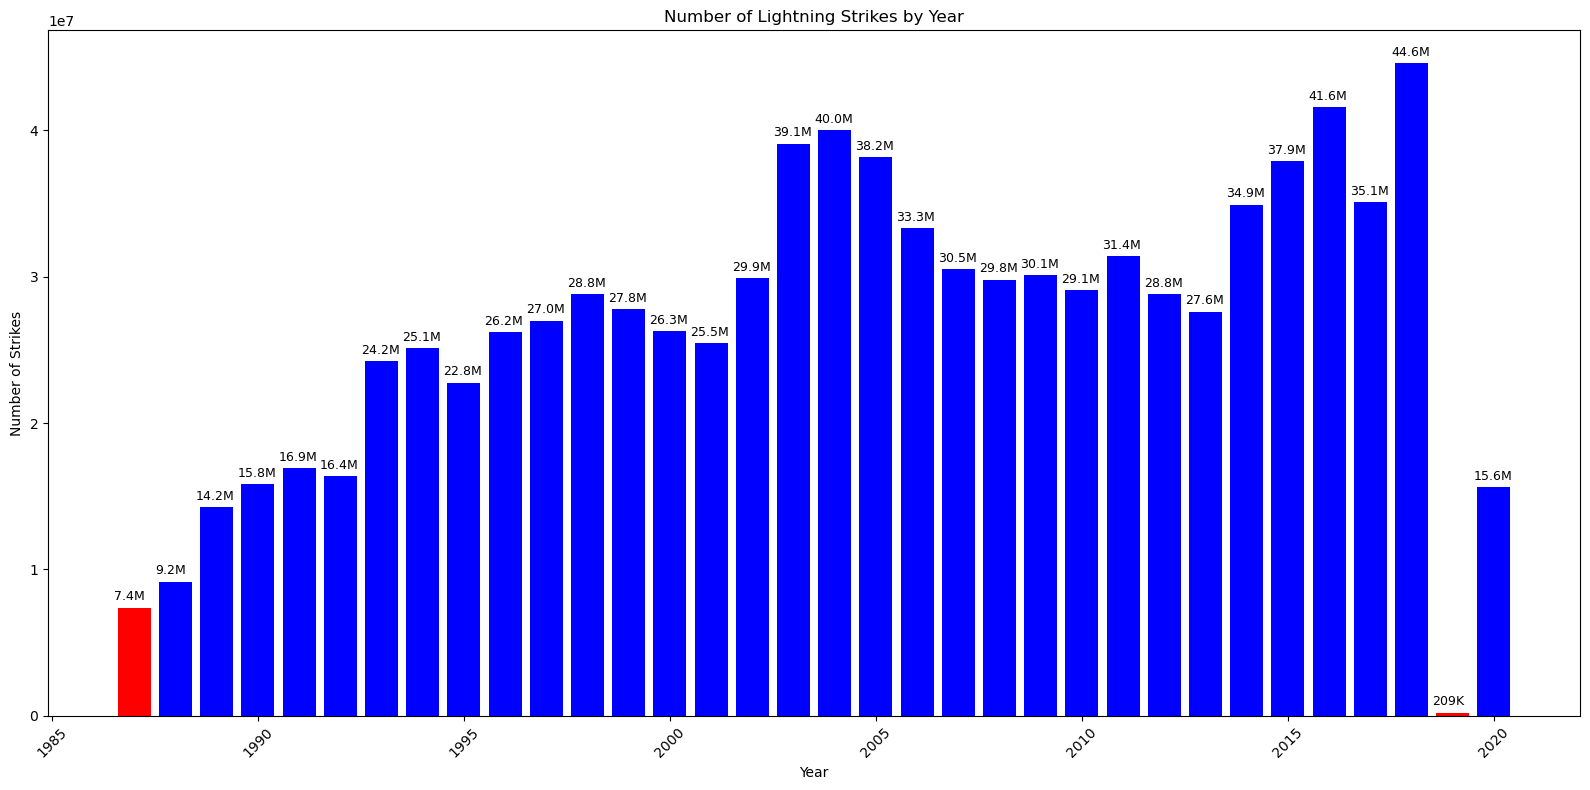

In [34]:

# Determine bar colors based on a threshold
colors = np.where(df['number_of_strikes'] < lower_limit, 'red', 'blue')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# Create a bar plot
bars = ax.bar(df['year'], df['number_of_strikes'], color=colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2 - 0.5, yval + 500000, readable_numbers(yval), fontsize=9)

# Customize axes and labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Strikes')
ax.set_title('Number of Lightning Strikes by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Investigating the outliers 2019 and 1987

In [39]:
df_2019 = pd.read_csv(r"C:\Users\Lahari Reddy\Desktop\GoogleDA\Exploratory_Data_Analysis\eda_outliers_dataset2.csv")

In [40]:
df_2019.head(10)

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)
5,2019-12-01,1,POINT(-85.4 36.8)
6,2019-12-01,1,POINT(-84 40.9)
7,2019-12-01,1,POINT(-54.7 40.9)
8,2019-12-01,1,POINT(-82.3 35.7)
9,2019-12-01,1,POINT(-55.7 40.7)


In [43]:
# Convert `date` column to datetime
df_2019['date']= pd.to_datetime(df_2019['date'])

# Create 2 new columns
df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)
df_2019_by_month = (
    df_2019
    .groupby(['month', 'month_txt'])[['number_of_strikes']]  # specify numeric column(s)
    .sum()
    .sort_values('month', ascending=True)
    .reset_index()
)

df_2019_by_month

,month,month_txt,number_of_strikes
0,12,Dec,209166


In [44]:
df_1987 = pd.read_csv(r"C:\Users\Lahari Reddy\Desktop\GoogleDA\Exploratory_Data_Analysis\eda_outliers_dataset3.csv")

In [48]:
# Convert `date` column to datetime
df_1987['date'] = pd.to_datetime(df_1987['date'])

# Create 2 new columns
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort. Assign result to new df
df_1987_by_month = df_1987.groupby(['month', 'month_txt'])[['number_of_strikes']].sum().sort_values('month', ascending=True).reset_index()
df_1987_by_month

,month,month_txt,number_of_strikes
0,1,Jan,23044
1,2,Feb,61020
2,3,Mar,117877
3,4,Apr,157890
4,5,May,700910
5,6,Jun,1064166
6,7,Jul,2077619
7,8,Aug,2001899
8,9,Sep,869833
9,10,Oct,105627


In [49]:
# Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

# Recalculate mean and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M


## Conclusion

2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. We should probably exclude 2019 from the analysis (for most use cases).

1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data.